In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data in python
data=pd.read_csv('Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.shape

(6435, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
#converting date to its correct format:
from datetime import datetime
data['Date']=pd.to_datetime(data['Date'])
data['Date']

/tmp/ipykernel_285/1668663613.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])


0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [7]:
#to find Store with maximum sales
sales_per_store=data.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)
sales_per_store

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
19    206634862.0
31    199613906.0
23    198750618.0
24    194016021.0
11    193962787.0
28    189263681.0
41    181341935.0
32    166819246.0
18    155114734.0
22    147075649.0
12    144287230.0
26    143416394.0
34    138249763.0
40    137870310.0
35    131520672.0
8     129951181.0
17    127782139.0
45    112395341.0
21    108117879.0
25    101061179.0
43     90565435.0
15     89133684.0
7      81598275.0
42     79565752.0
9      77789219.0
29     77141554.0
16     74252425.0
37     74202740.0
30     62716885.0
3      57586735.0
38     55159626.0
36     53412215.0
5      45475689.0
44     43293088.0
33     37160222.0
Name: Weekly_Sales, dtype: float64

In [8]:
pd.DataFrame(sales_per_store).head(3)

,Weekly_Sales
Store,
20,301397792.0
4,299543953.0
14,288999911.0


In [9]:
#to find Store with maximum standard deviation i.e., the sales vary a lot
#to find the coefficient of mean to standard deviation

In [10]:
data_std=data.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=False)
data_std

Store
14    317570.0
10    302262.0
20    275901.0
4     266201.0
13    265507.0
23    249788.0
27    239930.0
2     237684.0
39    217466.0
6     212526.0
35    211243.0
19    191723.0
41    187907.0
28    181759.0
18    176642.0
24    167746.0
11    165834.0
22    161251.0
1     155981.0
12    139167.0
32    138017.0
45    130169.0
21    128753.0
31    125856.0
15    120539.0
40    119002.0
25    112977.0
7     112585.0
17    112163.0
26    110431.0
8     106281.0
34    104630.0
29     99120.0
16     85770.0
9      69029.0
36     60725.0
42     50263.0
3      46320.0
38     42768.0
43     40598.0
5      37738.0
44     24763.0
33     24133.0
30     22810.0
37     21837.0
Name: Weekly_Sales, dtype: float64

In [11]:
pd.DataFrame(data_std).head(3)

,Weekly_Sales
Store,
14,317570.0
10,302262.0
20,275901.0


#### Store 14 has maximum standard deviation

In [12]:
store14_sales=data[data.Store==14].Weekly_Sales

In [13]:
print(store14_sales)

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64


In [14]:
#Coefficient of variation
CV=store14_sales.std()/store14_sales.mean()*100

In [15]:
CV

15.713673600948338

In [16]:
#Which store/s has good quarterly growth rate in Q3’2012
q2_sales=data[(data['Date']>='2012-04-01')&(data['Date']<'2012-07-01')].groupby('Store')['Weekly_Sales'].sum().round()
q3_sales=data[(data['Date']>='2012-07-01')&(data['Date']<'2012-10-01')].groupby('Store')['Weekly_Sales'].sum().round()

In [17]:
pd.DataFrame({'Q2':q2_sales,
              'Q3':q3_sales,
              'increase in sales':(q3_sales-q2_sales),
              'Growth Rate': (q3_sales-q2_sales)/q3_sales*100}).sort_values(by=['Growth Rate'],ascending=False).head(3)

,Q2,Q3,increase in sales,Growth Rate
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.869323
7,7613594.0,7322394.0,-291200.0,-3.976841
35,10753571.0,10252123.0,-501448.0,-4.891163


#### Some holidays have a negative impact on sales.Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [18]:
#Holiday Events 

Super_Bowl=['12-2-2010','11-2-2011','10-02-2012','8-2-2013']
Labour_Day=['10-9-2010','9-9-2011','7-9-2012','6-9-2013']
Thanksgiving=['26-11-2010','25-11-2011','23-11-2012','29-11-2013']
Christmas=['31-12-2010','30-12-2011','28-12-2012','27-12-2013']

In [19]:
Super_Bowl_sales=data.loc[data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean().round()
Labour_Day_sales=data.loc[data.Date.isin(Labour_Day)]['Weekly_Sales'].mean().round()
Thanksgiving_sales=data.loc[data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round()
Christmas_sales=data.loc[data.Date.isin(Christmas)]['Weekly_Sales'].mean().round()

/tmp/ipykernel_285/907725502.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Thanksgiving_sales=data.loc[data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round()
/tmp/ipykernel_285/907725502.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Christmas_sales=data.loc[data.Date.isin(Christmas)]['Weekly_Sales'].mean().round()


In [20]:
Super_Bowl_sales,Labour_Day_sales,Thanksgiving_sales,Christmas_sales

(1079128.0, 1042427.0, 1471273.0, 960833.0)

In [21]:
non_holiday_sales=data[(data['Holiday_Flag']==0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

1041256.38

In [22]:
#Thanksgiving sales has the highest sales as compared to the non holiday sales

In [23]:
#Provide a monthly and semester view of sales in units and give insights
import datetime as dt
data['month']=data['Date'].dt.month
data['year']=data['Date'].dt.year
data['semester']=np.where(data['Date'].dt.month.le(6),'H1','H2')

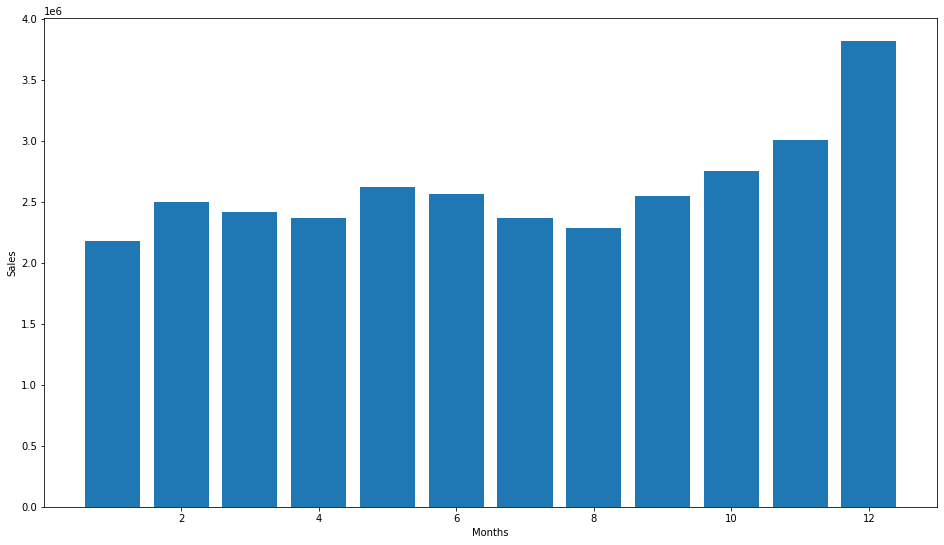

In [24]:
plt.figure(figsize=(16,9))
plt.bar(data['month'],data['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

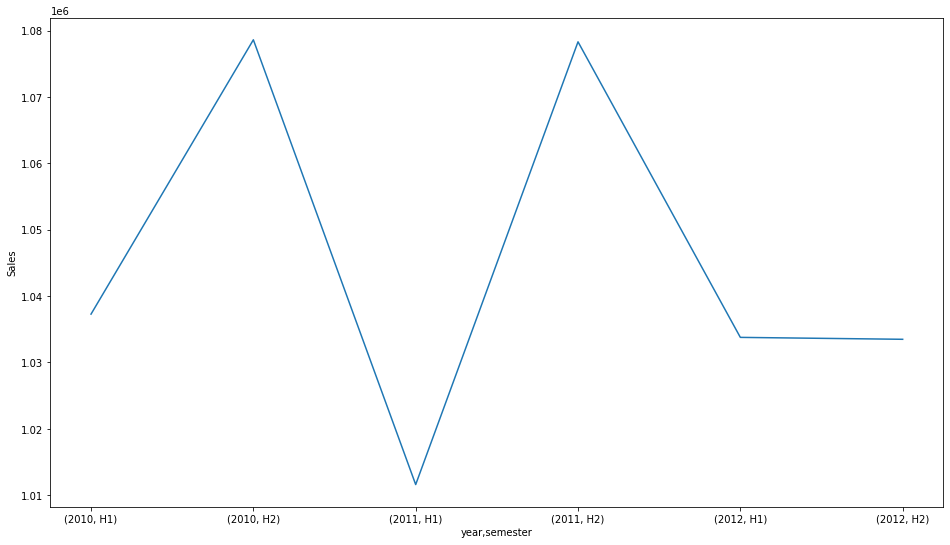

In [25]:
plt.figure(figsize=(16,9))
data.groupby(['year','semester'])['Weekly_Sales'].mean().plot()
plt.ylabel('Sales')
plt.show()

In [26]:
#change dates into days by creating new varaiable
data['weekday']=data['Date'].dt.day_name()

In [27]:
data['weekday']

0         Sunday
1       Thursday
2         Friday
3         Friday
4         Monday
          ...   
6430      Friday
6431    Thursday
6432      Monday
6433      Friday
6434      Friday
Name: weekday, Length: 6435, dtype: object

In [28]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,semester,weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,H1,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,H2,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,H1,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,H1,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,H1,Monday


In [29]:
# Restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order)
data['Res_Date'] = (data['Date'] - data['Date'].min()).dt.days + 1 #Date restructured

In [30]:
#To hypothesize if **CPI**, **unemployment**, and **fuel price** have any impact on sales, we can use **linear regression**
#Fuel_Price - Cost of fuel in the region
#CPI – Prevailing consumer price index
#Unemployment - Prevailing unemployment rate

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#for Store 1
Store1_data=data[(data['Store']==1)]
#dropping rest of the columns
Store1_data=Store1_data.drop(['Store','Date','Holiday_Flag','Temperature','month','year','semester','weekday'],axis=1)
Store1_data.head()

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Res_Date
0,1643690.90,2.572,211.096358,8.106,113
1,1641957.44,2.548,211.242170,8.106,327
2,1611968.17,2.514,211.289143,8.106,41
3,1409727.59,2.561,211.319643,8.106,48
4,1554806.68,2.625,211.350143,8.106,114


In [31]:
Store1_data.tail()

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Res_Date
138,1437059.26,3.666,222.981658,6.908,993
139,1670785.97,3.617,223.181477,6.573,852
140,1573072.81,3.601,223.381296,6.573,1066
141,1508068.77,3.594,223.425723,6.573,1014
142,1493659.74,3.506,223.444251,6.573,1021


In [32]:
#sorting by date resturctured
Store1_data.sort_values(by=['Res_Date'],ascending=True).head(10)

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Res_Date
34,1453329.50,2.603,211.671989,7.838,1
8,1594968.28,2.719,210.820450,7.808,26
21,1492418.14,2.669,211.223533,7.787,29
2,1611968.17,2.514,211.289143,8.106,41
3,1409727.59,2.561,211.319643,8.106,48
30,1540163.53,2.577,211.531248,7.787,59
43,1548033.78,2.708,211.607193,7.838,62
6,1472515.79,2.720,211.215635,8.106,69
7,1404429.92,2.732,211.018042,8.106,76
17,1615524.71,2.705,211.176428,7.808,87


In [33]:
Store1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
 1   Fuel_Price    143 non-null    float64
 2   CPI           143 non-null    float64
 3   Unemployment  143 non-null    float64
 4   Res_Date      143 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.7 KB


<AxesSubplot: >

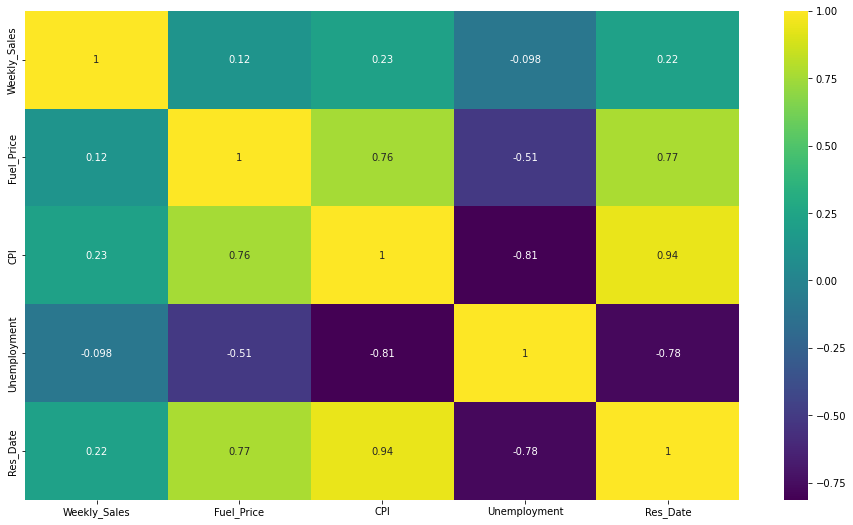

In [34]:
#annoted correlation
plt.figure(figsize=(16,9))
sns.heatmap(Store1_data.corr(),annot=True,cmap='viridis')
#Weekly Sales is weakly correlated with CPI, Unemployment, and Fuel Price
#Correlation is weakest between CPI and Unemployment
#Res_Date is highly correlated with Fuel Price, CPI, and Unemployment

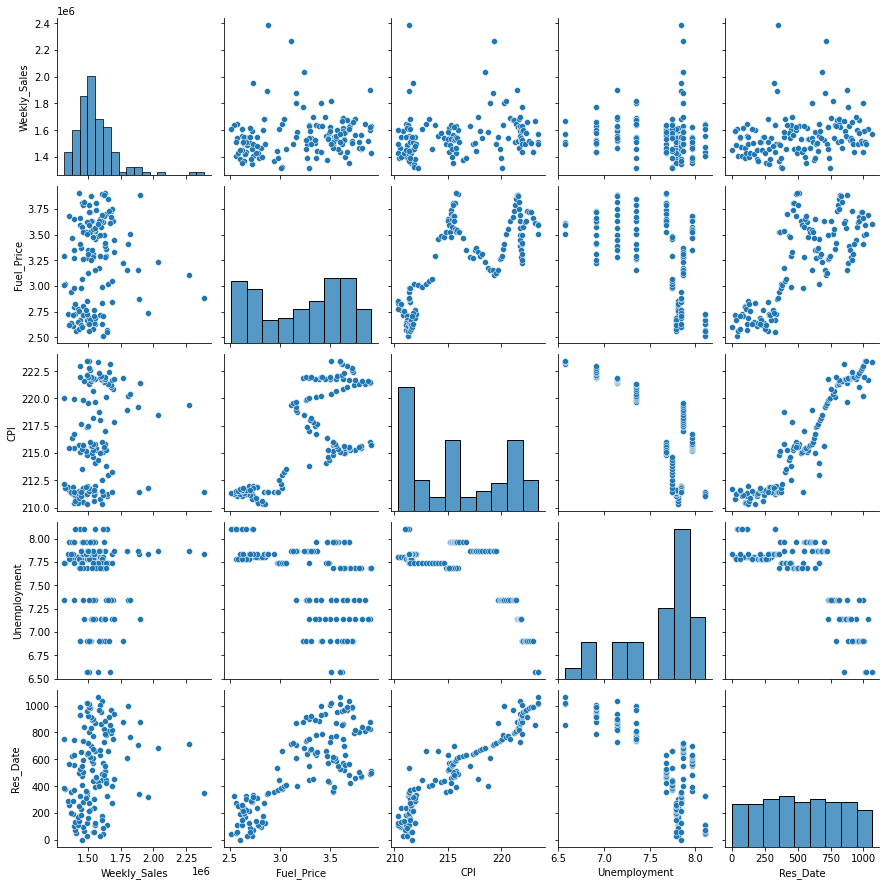

In [35]:
#Pairplot
sns.pairplot(Store1_data)

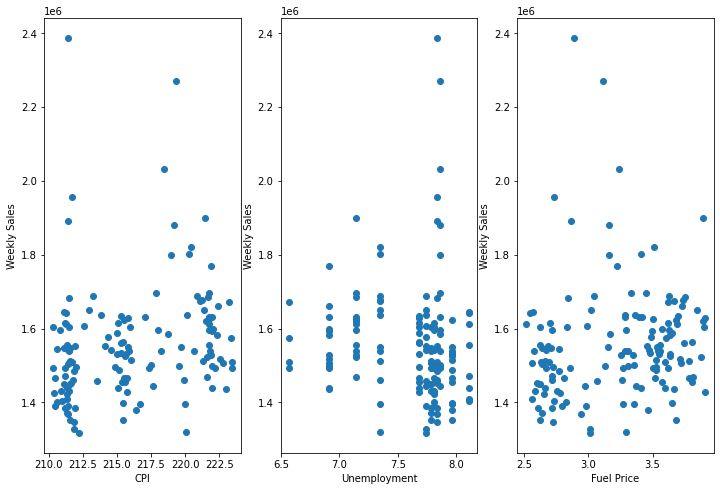

In [36]:
# Plot Scatter
fig, axs = plt.subplots(1, 3, figsize=(12, 8))
axs[0].scatter(Store1_data['CPI'],Store1_data['Weekly_Sales'])
axs[0].set_xlabel('CPI')
axs[0].set_ylabel('Weekly Sales')
axs[1].scatter(Store1_data['Unemployment'], Store1_data['Weekly_Sales'])
axs[1].set_xlabel('Unemployment')
axs[1].set_ylabel('Weekly Sales')
axs[2].scatter(Store1_data['Fuel_Price'],Store1_data['Weekly_Sales'])
axs[2].set_xlabel('Fuel Price')
axs[2].set_ylabel('Weekly Sales')
plt.show()

<Figure size 1152x648 with 0 Axes>

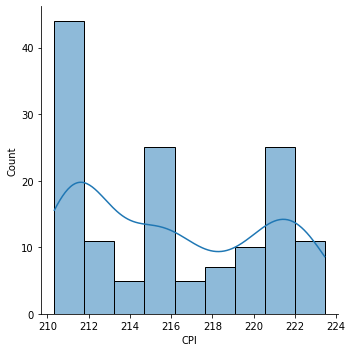

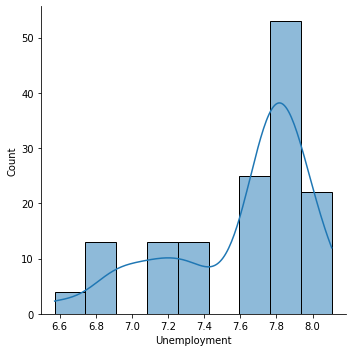

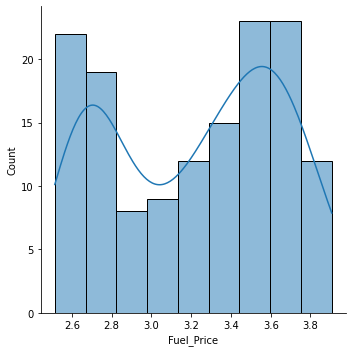

In [37]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.displot(Store1_data['CPI'],kde=True)
sns.displot(Store1_data['Unemployment'],kde=True)
sns.displot(Store1_data['Fuel_Price'],kde=True)
plt.tight_layout()
plt.show()

In [38]:
Store1_data.describe()

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Res_Date
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,1.555264e+06,3.219699,215.996892,7.610420,524.846154
std,1.559808e+05,0.427313,4.350890,0.383749,295.773379
min,1.316899e+06,2.514000,210.337426,6.573000,1.000000
25%,1.458105e+06,2.764500,211.549277,7.348000,277.500000
50%,1.534850e+06,3.290000,215.459905,7.787000,524.000000
75%,1.614892e+06,3.594000,220.531330,7.838000,779.500000
max,2.387950e+06,3.907000,223.444251,8.106000,1066.000000


In [39]:
# Prepare the data
X = Store1_data[['CPI', 'Unemployment', 'Fuel_Price']]
y = Store1_data['Weekly_Sales']

In [40]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [41]:
# Print the coefficients
print(f"Coefficients: {model.coef_}")

Coefficients: [ 21791.71895906 124063.65641864 -64838.31315855]


In [42]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination: 0.0849855578999581
intercept: -3887095.7723439923
slope: [ 21791.71895906 124063.65641864 -64838.31315855]


In [43]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[1551952.59631723 1556686.20124121 1559914.32848244 1557531.57519224
 1554046.57057834 1551988.00885393 1544955.7724737  1539871.83030821
 1499437.8785381  1491825.2443386  1486437.86808149 1486200.39374338
 1486092.59603158 1481446.11639868 1480158.78736156 1488068.69133364
 1498507.28733973 1508102.98527476 1516596.43406526 1518555.79525169
 1515009.73480879 1508858.3375811  1508100.32460402 1509157.29555919
 1513066.4983326  1513928.30038756 1517707.82653465 1516429.96643455
 1517459.67775911 1519591.64258653 1521529.09247448 1521521.39296768
 1521013.38874496 1519919.43746028 1529237.54420276 1528921.65049681
 1524740.52707171 1525452.53392159 1527072.27715569 1529859.11002665
 1528366.61422914 1523088.42050035 1522344.72867159 1521017.49420358
 1509186.45082471 1506179.20048657 1505072.80437793 1501372.87792212
 1487318.95778675 1488012.83764049 1493932.26090354 1502380.37837978
 1511801.07273257 1517720.49599562 1523010.37715285 1527983.60489795
 1519794.65507

In [44]:
y_pred = model.intercept_ + np.sum(model.coef_ * X,axis=1)
print(f"predicted response:\n{y_pred}")

predicted response:
0      1.551953e+06
1      1.556686e+06
2      1.559914e+06
3      1.557532e+06
4      1.554047e+06
           ...     
138    1.591392e+06
139    1.557362e+06
140    1.562754e+06
141    1.564176e+06
142    1.570286e+06
Length: 143, dtype: float64


<AxesSubplot: xlabel='CPI', ylabel='Weekly_Sales'>

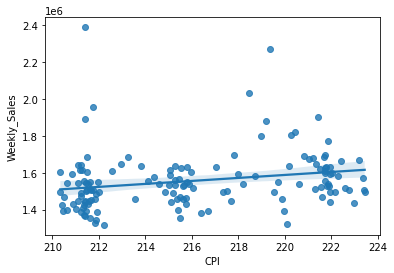

In [45]:
sns.regplot(x='CPI',y='Weekly_Sales',data=Store1_data)

<AxesSubplot: xlabel='Unemployment', ylabel='Weekly_Sales'>

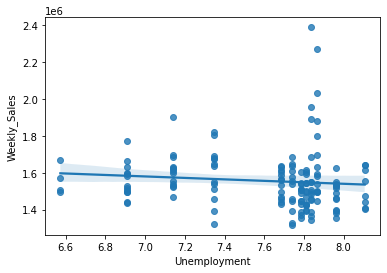

In [46]:
sns.regplot(x='Unemployment',y='Weekly_Sales',data=Store1_data)

<AxesSubplot: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

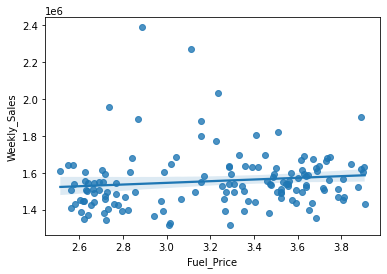

In [47]:
sns.regplot(x='Fuel_Price',y='Weekly_Sales',data=Store1_data)

In [48]:
#Accuracy of model
accuracy = model.score(X, y)
accuracy

0.0849855578999581

In [52]:
#testing data
X_test=pd.DataFrame(Store1_data[['CPI','Unemployment','Fuel_Price']]).where(Store1_data['Res_Date']==29).dropna()

In [53]:
y_pred=model.predict(X_test).round(2)

In [54]:
print(y_pred)

[1508858.34]


In [ ]:
#actual value for Weekly Sales is 1492418.14 as per DataFrame for Store 1